In [1]:
import numpy as np
import pandas as pd
import glob
import os
import librosa

In [2]:
INPUT_DIR="C:\\Users\\senthilku\\Desktop\\Heart Sound"
SAMPLE_RATE = 16000
MAX_SOUND_CLIP_DURATION=12 #sec  

In [3]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
#set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
frames = [set_a, set_b]
data_ab=pd.concat(frames)

In [4]:
print("Number of training examples=", data_ab.shape[0], "  Number of classes=", len(data_ab.label.unique()))

Number of training examples= 832   Number of classes= 6


In [5]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [6]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [7]:
# load dataset-a, keep them separate for testing purpose
import os, fnmatch

A_folder=INPUT_DIR+'/set_a/'
# set-a
A_artifact_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'artifact*.wav')
A_artifact_sounds = load_file_data(folder=A_folder,file_names=A_artifact_files, duration=MAX_SOUND_CLIP_DURATION)
A_artifact_labels = [0 for items in A_artifact_files]

A_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'normal*.wav')
A_normal_sounds = load_file_data(folder=A_folder,file_names=A_normal_files, duration=MAX_SOUND_CLIP_DURATION)
A_normal_labels = [2 for items in A_normal_sounds]

A_extrahls_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'extrahls*.wav')
A_extrahls_sounds = load_file_data(folder=A_folder,file_names=A_extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
A_extrahls_labels = [1 for items in A_extrahls_sounds]

A_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'murmur*.wav')
A_murmur_sounds = load_file_data(folder=A_folder,file_names=A_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
A_murmur_labels = [1 for items in A_murmur_files]

# test files
A_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_a'), 'Aunlabelledtest*.wav')
A_unlabelledtest_sounds = load_file_data(folder=A_folder,file_names=A_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
A_unlabelledtest_labels = [-1 for items in A_unlabelledtest_sounds]

print ("loaded dataset-a")

load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105060108.wav
fixing audio lenght : artifact__201105060108.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/artifact__2011052808

fixing audio lenght : normal__201106151236.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201106210943.wav
fixing audio lenght : normal__201106210943.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201106221418.wav
fixing audio lenght : normal__201106221418.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201106221450.wav
fixing audio lenght : normal__201106221450.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011112.wav
fixing audio lenght : normal__201108011112.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011114.wav
fixing audio lenght : normal__201108011114.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011115.wav
fixing audio lenght : normal__201108011115.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/normal__201108011118.wav
fixing audio lenght : normal__201108011118.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/e

fixing audio lenght : Aunlabelledtest__201101091156.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201101110659.wav
fixing audio lenght : Aunlabelledtest__201101110659.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201101152256.wav
fixing audio lenght : Aunlabelledtest__201101152256.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201101220549.wav
fixing audio lenght : Aunlabelledtest__201101220549.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201101241434.wav
fixing audio lenght : Aunlabelledtest__201101241434.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201102081033.wav
fixing audio lenght : Aunlabelledtest__201102081033.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledtest__201102081045.wav
fixing audio lenght : Aunlabelledtest__201102081045.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_a/Aunlabelledt

In [9]:
%%time
# load dataset-b, keep them separate for testing purpose 
B_folder=INPUT_DIR+'/set_b/'
# set-b
B_normal_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'normal*.wav')  # include noisy files
B_normal_sounds = load_file_data(folder=B_folder,file_names=B_normal_files, duration=MAX_SOUND_CLIP_DURATION)
B_normal_labels = [2 for items in B_normal_sounds]

B_murmur_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'murmur*.wav')  # include noisy files
B_murmur_sounds = load_file_data(folder=B_folder,file_names=B_murmur_files, duration=MAX_SOUND_CLIP_DURATION)
B_murmur_labels = [1 for items in B_murmur_files]

B_extrastole_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'extrastole*.wav')
B_extrastole_sounds = load_file_data(folder=B_folder,file_names=B_extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
B_extrastole_labels = [1 for items in B_extrastole_files]

#test files
B_unlabelledtest_files = fnmatch.filter(os.listdir(INPUT_DIR+'/set_b'), 'Bunlabelledtest*.wav')
B_unlabelledtest_sounds = load_file_data(folder=B_folder,file_names=B_unlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
B_unlabelledtest_labels = [-1 for items in B_unlabelledtest_sounds]
print ("loaded dataset-b")

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_101_1305030823364_E.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_104_1305032492469_A.wav
fixing audio lenght : normal_noisynormal_104_1305032492469_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_105_1305033453095_A.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  C:\Us

fixing audio lenght : normal_noisynormal_137_1306764999211_D1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_138_1306762146980_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_138_1306762146980_D.wav
fixing audio lenght : normal_noisynormal_138_1306762146980_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_139_1306519274653_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_140_1306519735121_C.wav
fixing audio lenght : normal_noisynormal_140_1306519735121_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_141_1306520154450_A1.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_141_1306520154450_B1.wav
fixing audio lenght : normal_noisynormal_141_1306520154450_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_1

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_296_1311682952647_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal_noisynormal_296_1311682952647_D.wav
fixing audio lenght : normal_noisynormal_296_1311682952647_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_B.wav
fixing audio lenght : normal__103_1305031931979_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_D1.wav
fixing audio lenght : normal__103_1305031931979_D1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_D2.wav
fixing audio lenght : normal__103_1305031931979_D2.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__103_1305031931979_D3.wav
fixing audio lenght : normal__103_1305031931979_D3.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__106_1306776721273_B1.wav
fixing audio lenght : normal__106_1306776721273_B1.wav
load file  C:\Users

fixing audio lenght : normal__150_1306776340746_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__150_1306776340746_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__151_1306779785624_A.wav
fixing audio lenght : normal__151_1306779785624_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__151_1306779785624_D.wav
fixing audio lenght : normal__151_1306779785624_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__152_1306779561195_B1.wav
fixing audio lenght : normal__152_1306779561195_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__152_1306779561195_C1.wav
fixing audio lenght : normal__152_1306779561195_C1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__152_1306779561195_D.wav
fixing audio lenght : normal__152_1306779561195_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__153_1306848820671_A.wav
fixing audio lenght : normal__153_1306848820671_A.wav
lo

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__191_1308077299430_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__194_1308139824187_A.wav
fixing audio lenght : normal__194_1308139824187_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__194_1308139824187_A1.wav
fixing audio lenght : normal__194_1308139824187_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__198_1308141739338_C.wav
fixing audio lenght : normal__198_1308141739338_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__201_1308144942432_A.wav
fixing audio lenght : normal__201_1308144942432_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__201_1308144942432_A1.wav
fixing audio lenght : normal__201_1308144942432_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__202_1308145175747_C.wav
fixing audio lenght : normal__202_1308145175747_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/

fixing audio lenght : normal__274_1311075637574_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__278_1311163365896_A.wav
fixing audio lenght : normal__278_1311163365896_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__278_1311163365896_A1.wav
fixing audio lenght : normal__278_1311163365896_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__280_1311165195344_A.wav
fixing audio lenght : normal__280_1311165195344_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__282_1311166081161_C.wav
fixing audio lenght : normal__282_1311166081161_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__283_1311167409239_A.wav
fixing audio lenght : normal__283_1311167409239_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__286_1311170606028_A.wav
fixing audio lenght : normal__286_1311170606028_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/normal__286_1311170606028_A1.wav
fix

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__156_1306936373241_B.wav
fixing audio lenght : murmur__156_1306936373241_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__160_1307100683334_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__160_1307100683334_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__161_1307101199321_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__162_1307101835989_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__162_1307101835989_B.wav
fixing audio lenght : murmur__162_1307101835989_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__164_1307106095995_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__164_1307106095995_C.wav
fixing audio lenght : murmur__164_1307106095995_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/murmur__165_1307109069581_C.wav
fixing audio lenght : murmur__165_130710906958

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__140_1306519735121_D.wav
fixing audio lenght : extrastole__140_1306519735121_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__144_1306522408528_B.wav
fixing audio lenght : extrastole__144_1306522408528_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__144_1306522408528_B1.wav
fixing audio lenght : extrastole__144_1306522408528_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__148_1306768801551_B.wav
fixing audio lenght : extrastole__148_1306768801551_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__151_1306779785624_B.wav
fixing audio lenght : extrastole__151_1306779785624_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__153_1306848820671_C.wav
fixing audio lenght : extrastole__153_1306848820671_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/extrastole__154_1306935608852_D2.wav
fixin

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__113_1306244002866_C.wav
fixing audio lenght : Bunlabelledtest__113_1306244002866_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__115_1306259437619_D.wav
fixing audio lenght : Bunlabelledtest__115_1306259437619_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__116_1306258689913_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__117_1306262456650_B1.wav
fixing audio lenght : Bunlabelledtest__117_1306262456650_B1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__118_1306262335509_A.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__118_1306262335509_A1.wav
fixing audio lenght : Bunlabelledtest__118_1306262335509_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__118_1306262335509_C2.wav
f

fixing audio lenght : Bunlabelledtest__155_1306935902813_B2.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__155_1306935902813_D.wav
fixing audio lenght : Bunlabelledtest__155_1306935902813_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__156_1306936373241_C.wav
fixing audio lenght : Bunlabelledtest__156_1306936373241_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__156_1306936373241_D.wav
fixing audio lenght : Bunlabelledtest__156_1306936373241_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__157_1306937583792_C.wav
fixing audio lenght : Bunlabelledtest__157_1306937583792_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__159_1307018640315_A.wav
fixing audio lenght : Bunlabelledtest__159_1307018640315_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__159_1307018640315_B.wav
fixing audio lenght : Bunlabelledtest__

load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__209_1308162216750_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__209_1308162216750_C.wav
fixing audio lenght : Bunlabelledtest__209_1308162216750_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__210_1308162935880_D.wav
fixing audio lenght : Bunlabelledtest__210_1308162935880_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__212_1308245076477_C.wav
fixing audio lenght : Bunlabelledtest__212_1308245076477_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__213_1308245263936_B.wav
fixing audio lenght : Bunlabelledtest__213_1308245263936_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__214_1308245489717_A1.wav
fixing audio lenght : Bunlabelledtest__214_1308245489717_A1.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__215_1308245664733_D.wav
fixi

fixing audio lenght : Bunlabelledtest__293_1311680805936_B2.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__294_1311681084248_D.wav
fixing audio lenght : Bunlabelledtest__294_1311681084248_D.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__296_1311682952647_A.wav
fixing audio lenght : Bunlabelledtest__296_1311682952647_A.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__296_1311682952647_B.wav
fixing audio lenght : Bunlabelledtest__296_1311682952647_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__300_1311772096120_B.wav
fixing audio lenght : Bunlabelledtest__300_1311772096120_B.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__300_1311772096120_C.wav
fixing audio lenght : Bunlabelledtest__300_1311772096120_C.wav
load file  C:\Users\senthilku\Desktop\Heart Sound/set_b/Bunlabelledtest__300_1311772096120_D.wav
fixing audio lenght : Bunlabelledtest__

In [10]:
#combine set-a and set-b 
x_data = np.concatenate((A_artifact_sounds, A_normal_sounds,A_extrahls_sounds,A_murmur_sounds, 
                         B_normal_sounds,B_murmur_sounds,B_extrastole_sounds))

y_data = np.concatenate((A_artifact_labels, A_normal_labels,A_extrahls_labels,A_murmur_labels,
                         B_normal_labels,B_murmur_labels,B_extrastole_labels))

test_x = np.concatenate((A_unlabelledtest_sounds,B_unlabelledtest_sounds))
test_y = np.concatenate((A_unlabelledtest_labels,B_unlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [11]:
x_data=np.squeeze(x_data)
test_x=np.squeeze(test_x)

In [12]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=seed, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed, shuffle=True)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
from sklearn.linear_model import LogisticRegression
logi_reg=LogisticRegression()
logi_reg.fit(x_train,y_train)
ypred_logi=logi_reg.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
acc_logi=accuracy_score(y_test,ypred_logi)
print(acc_logi*100)

64.1025641025641


In [16]:
cm_logi=confusion_matrix(y_test,ypred_logi)

In [17]:
print(cm_logi)

[[10  0  1]
 [ 0  9 16]
 [ 2 23 56]]


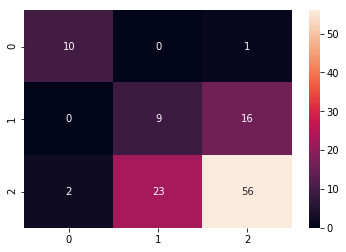

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.heatmap(cm_logi,annot=True)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

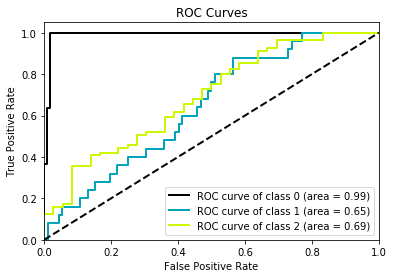

<Figure size 432x288 with 0 Axes>

In [19]:
import scikitplot as skplt
prob_logi=logi_reg.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_logi,curves=("each_class"))
plt.figure()

In [20]:
from sklearn.ensemble import RandomForestClassifier
mod_RF=RandomForestClassifier()
mod_RF.fit(x_train,y_train)
pred_RF=mod_RF.predict(x_test)


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
acc_RF=accuracy_score(y_test,pred_RF)
print(acc_RF*100)

64.95726495726495


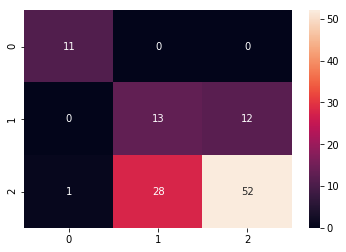

In [22]:
cm_RF=confusion_matrix(y_test,pred_RF)
sb.heatmap(cm_RF,annot=True)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

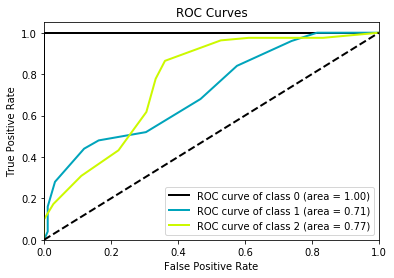

<Figure size 432x288 with 0 Axes>

In [23]:

prob_RF=mod_RF.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_RF,curves=("each_class"))
plt.figure()
#cm1=skplt.metrics.confusion_matrix(y_test,pred_RF)


40.17094017094017


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

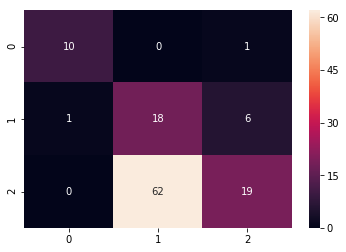

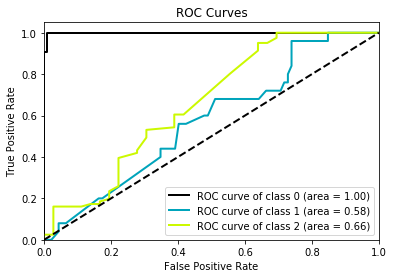

<Figure size 432x288 with 0 Axes>

In [24]:
from sklearn.ensemble import AdaBoostClassifier
mod_ada=AdaBoostClassifier()
mod_ada.fit(x_train,y_train)
pred_ada=mod_ada.predict(x_test)
acc_ada=accuracy_score(y_test,pred_ada)
print(acc_ada*100)
cm_ada=confusion_matrix(y_test,pred_ada)
sb.heatmap(cm_ada,annot=True)
prob_ada=mod_ada.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_ada,curves=("each_class"))
plt.figure()

68.37606837606837


C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

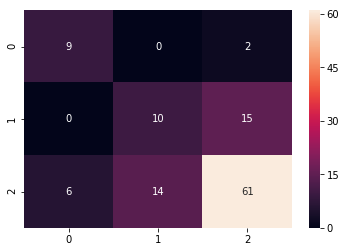

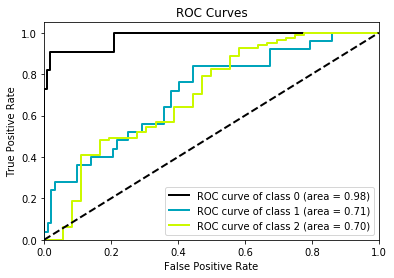

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.svm import SVC
mod_svc=SVC(kernel='linear',probability = True)
mod_svc.fit(x_train,y_train)
pred_svc=mod_svc.predict(x_test)
acc_svc=accuracy_score(y_test,pred_svc)
print(acc_svc*100)
cm_svc=confusion_matrix(y_test,pred_svc)
sb.heatmap(cm_svc,annot=True)
prob_svc=mod_svc.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test,prob_svc,curves=("each_class"))
plt.figure()

In [41]:
ACC=pd.DataFrame({'Algorithm':['Logistic Regression', 'Random Forest','Adaboost','SVM'],'Accuracy':[acc_logi*100,acc_RF*100,acc_ada*100,acc_svc*100]},columns=['Algorithm','Accuracy'])

In [42]:
ACC.head()

,Algorithm,Accuracy
0,Logistic Regression,64.102564
1,Random Forest,64.957265
2,Adaboost,40.170940
3,SVM,68.376068
